In [1]:
# The dataset shows the number of positive cases of Covid-19 for each state of Malaysia from 25/01/2020 to 08/08/2020.

# The dataset is available at https://www.kaggle.com/datasets/mahirahmzh/covid19-malaysia-by-region/data

# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Set dataframe display

pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import dataset

raw_csv_data = pd.read_csv("Cases_ByState.csv")

# Dataset

raw_csv_data.head()

,Date,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
0,25/1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
1,28/1,2(1),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4(1),NaN,NaN,NaN,NaN
2,30/1,3(1),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
3,3/2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5(1),NaN,1,NaN,NaN
4,5/2,3,2(1),NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,2(1),NaN,NaN


In [2]:
# List of last five rows

raw_csv_data.tail()

,Date,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
159,4/8,742,122,160,258,"1,029",370,121,264,20(1),400,678,"2,130",114,"2,476",98,20
160,5/8,743(1),125(3),160,258,"1,029",370,121,264,20,402(2),678,"2,130",114,"2,491(15)",98,20
161,6/8,743,131(6),160,258,"1,031(2)",370,121,264,20,406(4),678,"2,130",114,"2,493(2)",98,21(1)
162,7/8,744(1),132(1),160,258,"1,031",370,122(1),266(2),30(10),410(4),679(1),"2,132(2)",114,"2,496(3)",98,21
163,8/8,744,132,160,258,"1,032(1)",370,122,266,30,410,680(1),"2,133(1)",114,"2,499(3)",98,22(1)


In [3]:
# We can see that the numbers are in cumulative.

# We can see that the numbers in bracket are the number of cases increase from the previous count.

# We can see that the empty cells are representing zero case.

# We can see that the numbers in thousands contains comma ',' character.

# We can see that the column Date contains gap in between.

In [4]:
# Copy to start data cleaning

df = raw_csv_data.copy()

In [5]:
# Shape of dataset

df.shape

(164, 17)

In [6]:
# Info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    164 non-null    object
 1   JH      164 non-null    object
 2   KD      163 non-null    object
 3   KE      148 non-null    object
 4   ML      148 non-null    object
 5   NS      160 non-null    object
 6   PH      148 non-null    object
 7   PG      148 non-null    object
 8   PK      148 non-null    object
 9   PR      148 non-null    object
 10  SB      148 non-null    object
 11  SR      147 non-null    object
 12  SE      164 non-null    object
 13  TR      146 non-null    object
 14  KL      161 non-null    object
 15  PT      145 non-null    object
 16  LB      148 non-null    object
dtypes: object(17)
memory usage: 21.9+ KB


In [7]:
# We can see that the dataset contains 17 columns and 164 rows.

# The columns are: 

# Column 1  = Date
# Column 2  = States of Malaysia (JH - Johor)
# Column 3  = States of Malaysia (KD - Kedah)
# Column 4  = States of Malaysia (KE - Kelantan)
# Column 5  = States of Malaysia (ML - Melaka)
# Column 6  = States of Malaysia (NS - Negeri Sembilan)
# Column 7  = States of Malaysia (PH - Pahang)
# Column 8  = States of Malaysia (PG - Pulau Pinang)
# Column 9  = States of Malaysia (PK - Perak)
# Column 10 = States of Malaysia (PR - Perlis)
# Column 11 = States of Malaysia (SB - Sabah)
# Column 12 = States of Malaysia (SR - Sarawak)
# Column 13 = States of Malaysia (SE - Selangor)
# Column 14 = States of Malaysia (TR - Terengganu)
# Column 15 = States of Malaysia (KL - Kuala Lumpur)
# Column 16 = States of Malaysia (PT - Putrajaya)
# Column 17 = States of Malaysia (LB - Labuan)

# We can see that there are null values in the dataset.

# We can see that the column Date is of object data type, but it is actually a timestamp.

# We can see that the columns States of Malaysia are of object data type, but they are actually integers.

In [8]:
# To-Do List (df)

# A1. Convert column Date to timestamp data type.
# A2. Set column Date as index.
# A3. Remove column Date.
# A4. Remove comma ',' character.
# A5. Replace empty cells with 0.
# A6. Duplicate 2 datasets (1 for Cumulative Cases and 1 for Count of Cases).

# To-Do List of Cumulative Cases (df_cum)

# B1. Remove numbers in bracket.
# B2. Convert column States of Malaysia to integer data type.
# B3. Fill gaps in index with previous cumulated cases to complete time series.

# To-Do List of Count of Cases (df_ct)

# C1. Remove numbers outside bracket.
# C2. Convert column States of Malaysia to integer data type.
# C3. Fill gaps in index with 0 case to complete time series.
# C4. Add column Total representing the sum of new cases daily.


In [9]:
# A1. Convert column Date to timestamp data type

# A1.1. Add year 2020

df['Date'] = df['Date']+'/2020'

In [10]:
# A1.2. Convert to timestamp data type

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [11]:
# A2. Set column Date as index

df.index = df['Date']

In [12]:
# A3. Remove column Date

df = df.drop(['Date'], axis = 1)

In [13]:
# A4. Remove comma ',' character

df = df.replace(to_replace = r'\,', value = '', regex = True)

In [14]:
# A5. Replace empty cells with 0

df = df.fillna(0)

In [15]:
df.head()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
Date,,,,,,,,,,,,,,,,
2020-01-25,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
2020-01-28,2(1),1,0,0,0,0,0,0,0,0,0,4(1),0,0,0,0
2020-01-30,3(1),1,0,0,0,0,0,0,0,0,0,4,0,0,0,0
2020-02-03,3,1,0,0,0,0,0,0,0,0,0,5(1),0,1,0,0
2020-02-05,3,2(1),0,0,2,0,0,0,0,0,0,5,0,2(1),0,0


In [16]:
df.tail()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
Date,,,,,,,,,,,,,,,,
2020-08-04,742,122,160,258,1029,370,121,264,20(1),400,678,2130,114,2476,98,20
2020-08-05,743(1),125(3),160,258,1029,370,121,264,20,402(2),678,2130,114,2491(15),98,20
2020-08-06,743,131(6),160,258,1031(2),370,121,264,20,406(4),678,2130,114,2493(2),98,21(1)
2020-08-07,744(1),132(1),160,258,1031,370,122(1),266(2),30(10),410(4),679(1),2132(2),114,2496(3),98,21
2020-08-08,744,132,160,258,1032(1),370,122,266,30,410,680(1),2133(1),114,2499(3),98,22(1)


In [17]:
# A6. Duplicate 2 datasets (1 for Cumulative Cases and 1 for Count of Cases)

df_cum = df.copy()
df_ct = df.copy()

In [18]:
# B1. Remove numbers in bracket

df_cum = df_cum.replace(to_replace = '\([0-9]+\)', value = '', regex = True)

In [19]:
# B2. Convert column States of Malaysia to integer data type

for i in df_cum.columns:
    df_cum[i] = df_cum[i].astype(int)

In [20]:
# B3. Fill gaps in index with previous cumulated cases to complete time series

new_dates = pd.date_range(start = df.index.min(), end = df.index.max(), freq = 'D')

df_cum = df_cum.reindex(new_dates, method = 'ffill').rename_axis('Date')

In [21]:
df_cum.head()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
Date,,,,,,,,,,,,,,,,
2020-01-25,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
2020-01-26,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
2020-01-27,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
2020-01-28,2,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0
2020-01-29,2,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0


In [22]:
df_cum.tail()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB
Date,,,,,,,,,,,,,,,,
2020-08-04,742,122,160,258,1029,370,121,264,20,400,678,2130,114,2476,98,20
2020-08-05,743,125,160,258,1029,370,121,264,20,402,678,2130,114,2491,98,20
2020-08-06,743,131,160,258,1031,370,121,264,20,406,678,2130,114,2493,98,21
2020-08-07,744,132,160,258,1031,370,122,266,30,410,679,2132,114,2496,98,21
2020-08-08,744,132,160,258,1032,370,122,266,30,410,680,2133,114,2499,98,22


In [23]:
df_cum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2020-01-25 to 2020-08-08
Freq: D
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   JH      197 non-null    int32
 1   KD      197 non-null    int32
 2   KE      197 non-null    int32
 3   ML      197 non-null    int32
 4   NS      197 non-null    int32
 5   PH      197 non-null    int32
 6   PG      197 non-null    int32
 7   PK      197 non-null    int32
 8   PR      197 non-null    int32
 9   SB      197 non-null    int32
 10  SR      197 non-null    int32
 11  SE      197 non-null    int32
 12  TR      197 non-null    int32
 13  KL      197 non-null    int32
 14  PT      197 non-null    int32
 15  LB      197 non-null    int32
dtypes: int32(16)
memory usage: 13.9 KB


In [24]:
# C1. Remove numbers outside bracket

for i in df_ct.columns:
    df_ct[i] = df_ct[i].str.extract(r'\((.+)\)').fillna(0)

# Replace first row with original records as the first positive case confirmed on 25/01/2020

df_ct.iloc[0] = df.iloc[0]

In [25]:
# C2. Convert column States of Malaysia to integer data type

for i in df_ct.columns:
    df_ct[i] = df_ct[i].astype(int)

In [26]:
# C3. Fill gaps in index with 0 case to complete time series

# Variable new_dates is defined in B3

df_ct = df_ct.reindex(new_dates, fill_value = 0).rename_axis('Date')

In [27]:
# C4. Add column Total representing the sum of new cases daily

df_ct['Total'] = df_ct.sum(axis = 1)

In [28]:
df_ct.head()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB,Total
Date,,,,,,,,,,,,,,,,,
2020-01-25,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,4
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_ct.tail()

,JH,KD,KE,ML,NS,PH,PG,PK,PR,SB,SR,SE,TR,KL,PT,LB,Total
Date,,,,,,,,,,,,,,,,,
2020-08-04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2020-08-05,1,3,0,0,0,0,0,0,0,2,0,0,0,15,0,0,21
2020-08-06,0,6,0,0,2,0,0,0,0,4,0,0,0,2,0,1,15
2020-08-07,1,1,0,0,0,0,1,2,10,4,1,2,0,3,0,0,25
2020-08-08,0,0,0,0,1,0,0,0,0,0,1,1,0,3,0,1,7


In [30]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197 entries, 2020-01-25 to 2020-08-08
Freq: D
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   JH      197 non-null    int32
 1   KD      197 non-null    int32
 2   KE      197 non-null    int32
 3   ML      197 non-null    int32
 4   NS      197 non-null    int32
 5   PH      197 non-null    int32
 6   PG      197 non-null    int32
 7   PK      197 non-null    int32
 8   PR      197 non-null    int32
 9   SB      197 non-null    int32
 10  SR      197 non-null    int32
 11  SE      197 non-null    int32
 12  TR      197 non-null    int32
 13  KL      197 non-null    int32
 14  PT      197 non-null    int32
 15  LB      197 non-null    int32
 16  Total   197 non-null    int64
dtypes: int32(16), int64(1)
memory usage: 15.4 KB


## Visualization

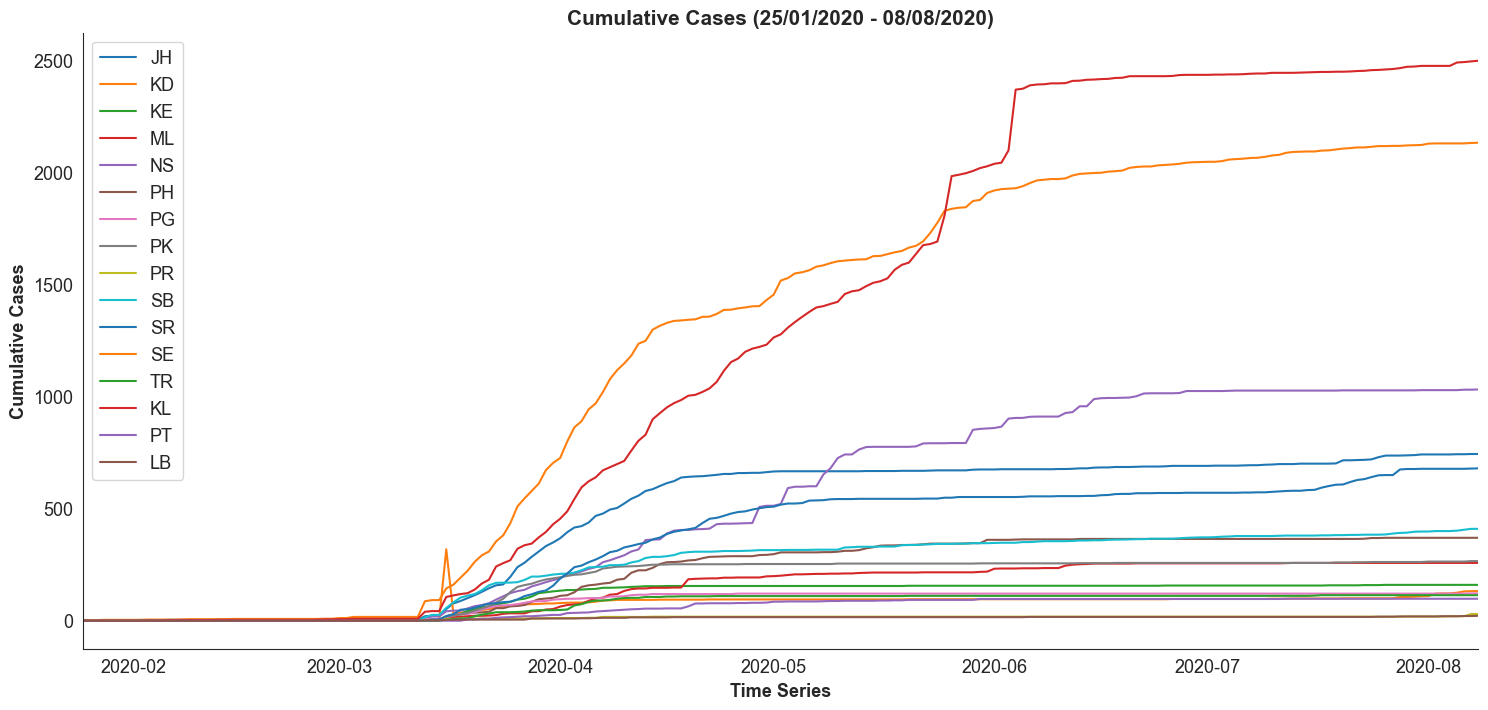

In [31]:
# Plot time series graph of cumulative cases

plt.figure(figsize = (18,8))

for i in df_cum.columns:
    plt.plot(df_cum.index, df_cum[i])

plt.title("Cumulative Cases (25/01/2020 - 08/08/2020)", fontsize = 15, fontweight = "bold")

plt.xlabel('Time Series', fontsize = 13, fontweight = 'bold')
plt.ylabel('Cumulative Cases', fontsize = 13, fontweight = 'bold')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlim(df_cum.index.min(), df_cum.index.max())

plt.legend(df_cum.columns, fontsize = 13)
sns.despine()
plt.show()

In [32]:
# Take a closer look at the cumulative cases of March 2020

df_cum_03 = df_cum[(df_cum.index >= '2020-03-01') & (df_cum.index <= '2020-03-31')]

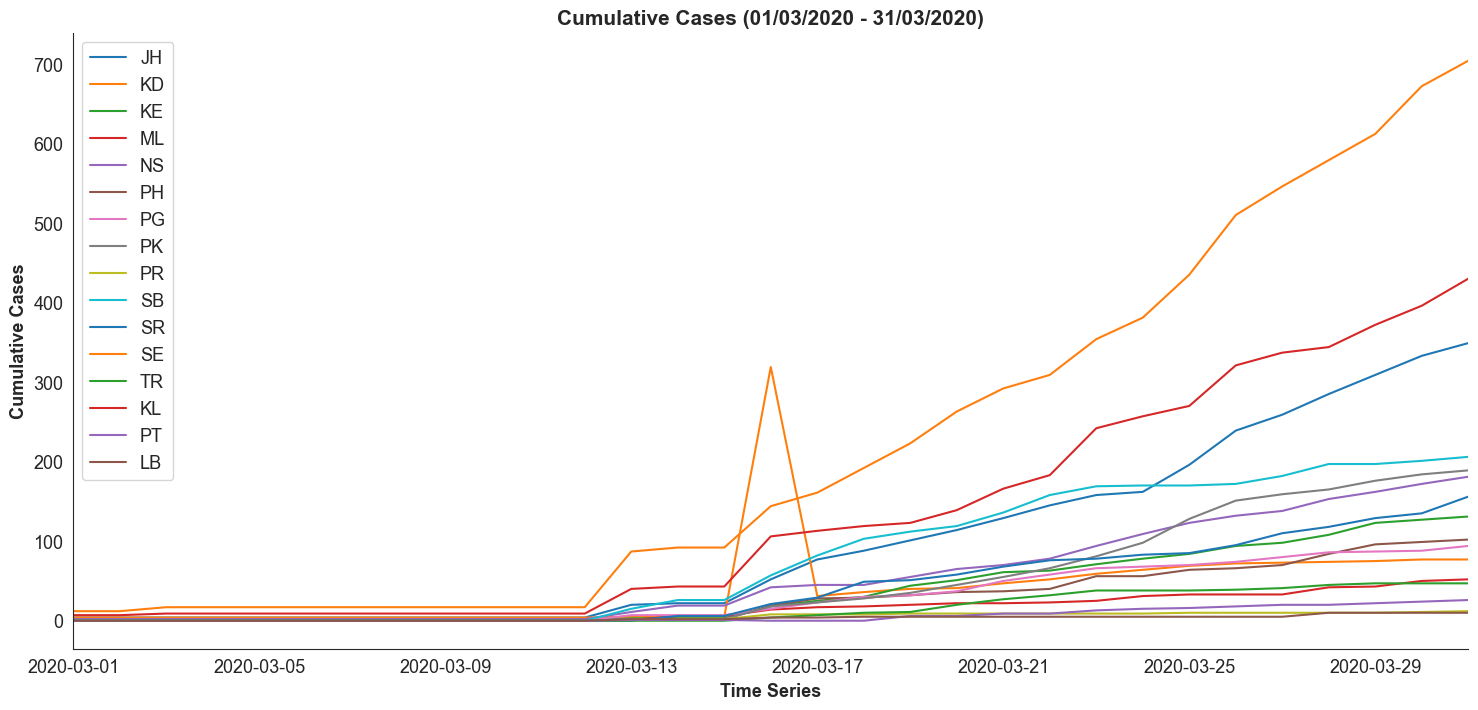

In [33]:
# Plot time series graph of cumulative cases (March 2020)

plt.figure(figsize = (18,8))

for i in df_cum_03.columns:
    plt.plot(df_cum_03.index, df_cum_03[i])

plt.title("Cumulative Cases (01/03/2020 - 31/03/2020)", fontsize = 15, fontweight = "bold")

plt.xlabel('Time Series', fontsize = 13, fontweight = 'bold')
plt.ylabel('Cumulative Cases', fontsize = 13, fontweight = 'bold')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlim(df_cum_03.index.min(), df_cum_03.index.max())

plt.legend(df_cum_03.columns, fontsize = 13)
sns.despine()
plt.show()

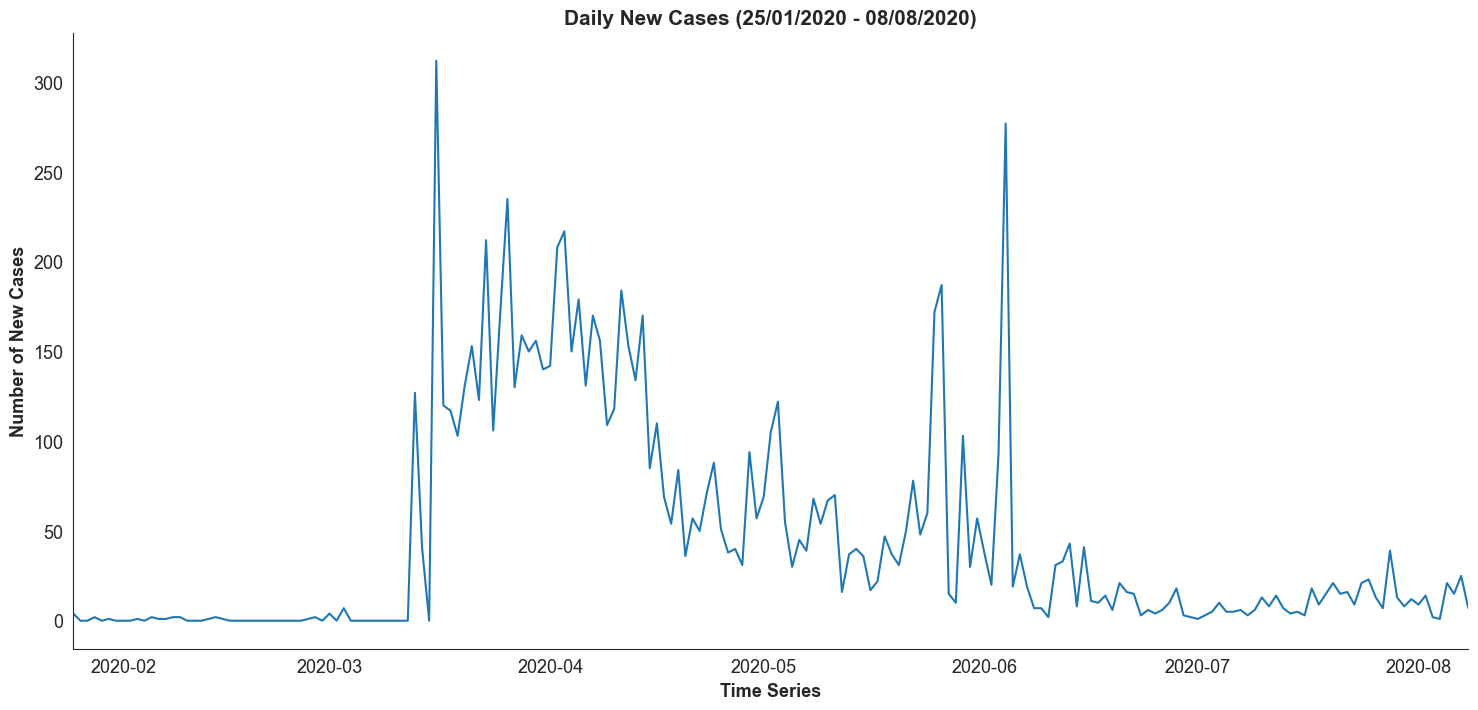

In [34]:
# Plot time series graph of daily new cases

plt.figure(figsize = (18,8))

plt.plot(df_ct.index, df_ct['Total'])

plt.title("Daily New Cases (25/01/2020 - 08/08/2020)", fontsize = 15, fontweight = "bold")

plt.xlabel('Time Series', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of New Cases', fontsize = 13, fontweight = 'bold')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.xlim(df_ct.index.min(), df_ct.index.max())

sns.despine()
plt.show()

## Additional Info - Export to CSV File

In [35]:
# Import library

from pathlib import Path

# Define path

filepath_cum = Path('.../Covid-19-Malaysia-Cumulative.csv')  
filepath_cum.parent.mkdir(parents = True, exist_ok = True)

filepath_ct = Path('.../Covid-19-Malaysia-Count.csv')  
filepath_ct.parent.mkdir(parents = True, exist_ok = True)  

In [36]:
# Export to CSV File

df_cum.to_csv(filepath_cum)
df_ct.to_csv(filepath_ct)

## Additional Info - Export to MySQL

In [37]:
# Import library

import pymysql

# Connect to MySQL

conn = pymysql.connect(database = 'covid19_msia', user = 'root', password = 'root123')
cursor = conn.cursor()

In [38]:
# Create table (Cumulative Cases)

cursor.execute('''
                DROP TABLE IF EXISTS covid19_cum;
               ''')

cursor.execute('''
                CREATE TABLE IF NOT EXISTS covid19_cum
                (
                    date date not null,
                    JH int not null, 
                    KD int not null, 
                    KE int not null, 
                    ML int not null, 
                    NS int not null, 
                    PH int not null, 
                    PG int not null, 
                    PK int not null, 
                    PR int not null, 
                    SB int not null, 
                    SR int not null, 
                    SE int not null, 
                    TR int not null, 
                    KL int not null, 
                    PT int not null, 
                    LB int not null
                );
               ''')

0

In [39]:
# Create table (Count of Cases)

cursor.execute('''
                DROP TABLE IF EXISTS covid19_ct;
               ''')

cursor.execute('''
                CREATE TABLE IF NOT EXISTS covid19_ct
                (
                    date date not null,
                    JH int not null, 
                    KD int not null, 
                    KE int not null, 
                    ML int not null, 
                    NS int not null, 
                    PH int not null, 
                    PG int not null, 
                    PK int not null, 
                    PR int not null, 
                    SB int not null, 
                    SR int not null, 
                    SE int not null, 
                    TR int not null, 
                    KL int not null, 
                    PT int not null, 
                    LB int not null, 
                    total int not null
                );
               ''')

0

In [40]:
# Define query to insert into cumulative table

insert_query_cum = 'INSERT INTO covid19_cum VALUES '

for i in range(df_cum.index.shape[0]):
    insert_query_cum += '(\'' + str(df_cum.index[i])[:10] + '\', '
    
    for j in df_cum.columns:
        insert_query_cum += str(df_cum[j][i]) + ', '
    
    insert_query_cum = insert_query_cum[:-2] + '), '
    
insert_query_cum = insert_query_cum[:-2] + ';'

In [41]:
# Insert query into cumulative table

cursor.execute(insert_query_cum)

197

In [42]:
# Define query to insert into count table

insert_query_ct = 'INSERT INTO covid19_ct VALUES '

for i in range(df_ct.index.shape[0]):
    insert_query_ct += '(\'' + str(df_ct.index[i])[:10] + '\', '
    
    for j in df_ct.columns:
        insert_query_ct += str(df_ct[j][i]) + ', '
    
    insert_query_ct = insert_query_ct[:-2] + '), '
    
insert_query_ct = insert_query_ct[:-2] + ';'

In [43]:
# Insert query into count table

cursor.execute(insert_query_ct)

197

In [44]:
# Commit

conn.commit()

In [45]:
# Close connection

conn.commit()